In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import netCDF4 

from ncmaps import Cmaps

from matplotlib import cm, colors

from ncmaps import Cmaps
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
import os

self_define_list = [130,144,155,170,185,200,225,235,245]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()

geo = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/geogphy_file/ETOPO1_Bed_g_gmt4.grd.nc')
x =geo.variables['x']
y = geo.variables['y']
z=  geo.variables['z']



def plot(filename):
    f = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/out/'+filename)
    u =f.variables['u'][0,0,:,:]
    v = f.variables['v'][0,0,:,:]
    ref =  f.variables['ref'][0,1,:,:]
    lat = f.variables['lat']
    lon = f.variables['lon']
    box = [118, 123.5, 26, 30]
    scale = '10m'
    xstep, ystep = 0.5, 0.5
    fig = plt.figure(figsize=(20, 15))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(box, crs=ccrs.PlateCarree())
    land = cfeature.NaturalEarthFeature('physical', 'land', scale, edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
    #ax.add_feature(land, facecolor='0.75')
    ax.coastlines(scale,color="blue",linewidth=1.0)
    fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang.shp'
    shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                    ccrs.PlateCarree(),  edgecolor='blue', facecolor='none')
    ax.add_feature(shape_feature,linewidth=1.8)
    #ax.stock_img()
    # ===================================================
    #标注坐标轴
    ax.set_xticks(np.arange(box[0], box[1]+xstep,xstep), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(box[2], box[3]+ystep,ystep), crs=ccrs.PlateCarree())
    # zero_direction_label用来设置经度的0度加不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    #ax.quiver(lon[::3],lat[::3],u[::3,::3], v[::3,::3], transform=ccrs.PlateCarree())
    #levels = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
    levels = [450,550,650,750,850,950,1050,1150]
    cont=ax.contourf(x[::4],y[::4],z[::4,::4],transform=ccrs.PlateCarree(),cmap=cmaps,levels=levels)
    ax.barbs(lon[::6],lat[::6],u[::6,::6], v[::6,::6], transform=ccrs.PlateCarree())
    plt.colorbar(cont, cmap = cmaps, ax = ax, spacing = 'uniform')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    # 添加网格线
    ax.grid()
    plt.title(filename[15:29],fontsize=35,fontweight='bold') 
    
    plt.savefig('/home/liyuan3970/Typhoon_LMQ/src/wind_imege/'+filename+'.png')
    #plt.show()

    plt.clf()
    plt.close()
    
path = "/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/out/"
file = os.listdir(path)[:]
file.sort()

for i in file:
    plot(i)




In [20]:
import numpy as np
from PIL import Image
import os
import time
import matplotlib.pyplot as plt
import imageio
path = "/home/liyuan3970/Typhoon_LMQ/src/wind_imege/"
file = os.listdir(path)
file.sort()
for i in range(len(file)):
    file[i] = path +file[i]
import imageio


def create_gif(image_list, gif_name, duration=0.35):
    frames = []
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    imageio.mimsave(gif_name, frames, 'GIF', duration=duration)
    return


def main():
    image_list =file
    gif_name = 'wind@geo.gif'
    duration = 0.35
    create_gif(image_list, gif_name, duration)
main()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import netCDF4 

from ncmaps import Cmaps

from matplotlib import cm, colors

from ncmaps import Cmaps
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
self_define_list = [130,144,155,170,185,200,225,235,245]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()

geo = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/geogphy_file/ETOPO1_Bed_g_gmt4.grd.nc')
x =geo.variables['x']
y = geo.variables['y']
z=  geo.variables['z']


f = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/out/Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc')

u =f.variables['u'][0,0,:,:]
v = f.variables['v'][0,0,:,:]
ref =  f.variables['ref'][0,1,:,:]
lat = f.variables['lat']
lon = f.variables['lon']




box = [118, 123.5, 26, 30]
scale = '10m'
xstep, ystep = 0.5, 0.5
fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent(box, crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical', 'land', scale, edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])
#ax.add_feature(land, facecolor='0.75')
ax.coastlines(scale,color="blue",linewidth=1.0)
fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(),  edgecolor='blue', facecolor='none')
ax.add_feature(shape_feature,linewidth=1.8)

#ax.stock_img()
# ===================================================
#标注坐标轴
ax.set_xticks(np.arange(box[0], box[1]+xstep,xstep), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(box[2], box[3]+ystep,ystep), crs=ccrs.PlateCarree())
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
#ax.quiver(lon[::3],lat[::3],u[::3,::3], v[::3,::3], transform=ccrs.PlateCarree())

#levels = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
levels = [450,550,650,750,850,950,1050,1150]
cont=ax.contourf(x[::4],y[::4],z[::4,::4],transform=ccrs.PlateCarree(),cmap=cmaps,levels=levels)
ax.barbs(lon[::6],lat[::6],u[::6,::6], v[::6,::6], transform=ccrs.PlateCarree())
plt.colorbar(cont, cmap = cmaps, ax = ax, spacing = 'uniform')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
ax.grid()
plt.savefig('wind.png')
plt.show()


(15, 3)


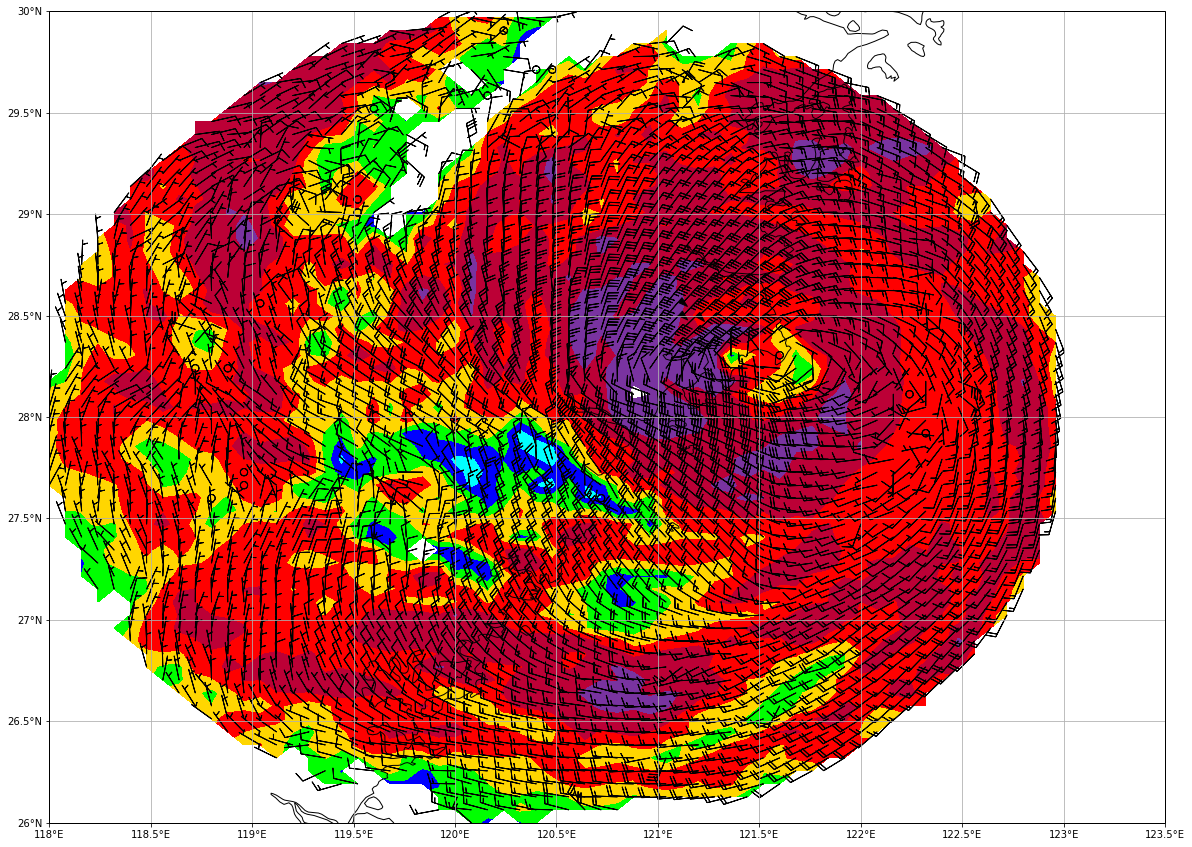

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import netCDF4 

from matplotlib import cm, colors

fid = open('/home/liyuan3970/study_demo/met_plot/rader/pup/radar.rgb')
data=fid.readlines()
n=len(data);
#print(n)
rgb=np.zeros((n,3))
for i in np.arange(n):
    #print(data[0].split(' '))
    rgb[i][0]=float(data[i].split(' ')[0])
    rgb[i][1]=data[i].split(' ')[1]
    rgb[i][2]=data[i].split(' ')[2]
print((rgb.shape))
#print(rgb[253])
cmaps= colors.ListedColormap(rgb)
f = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/out/Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc')

u =f.variables['u'][0,0,:,:]
v = f.variables['v'][0,0,:,:]
ref =  f.variables['ref'][0,1,:,:]
lat = f.variables['lat']
lon = f.variables['lon']




box = [118, 123.5, 26, 30]
scale = '10m'
xstep, ystep = 0.5, 0.5
fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent(box, crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical', 'land', scale, edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])
#ax.add_feature(land, facecolor='0.75')
ax.coastlines(scale)


#ax.stock_img()
# ===================================================
#标注坐标轴
ax.set_xticks(np.arange(box[0], box[1]+xstep,xstep), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(box[2], box[3]+ystep,ystep), crs=ccrs.PlateCarree())
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
#ax.quiver(lon[::3],lat[::3],u[::3,::3], v[::3,::3], transform=ccrs.PlateCarree())
ax.contourf(lon[::4],lat[::4],ref[::4,::4],transform=ccrs.PlateCarree(),cmap=cmaps)
ax.barbs(lon[::4],lat[::4],u[::4,::4], v[::4,::4], transform=ccrs.PlateCarree())

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
ax.grid()
plt.savefig('wind.png')
plt.show()


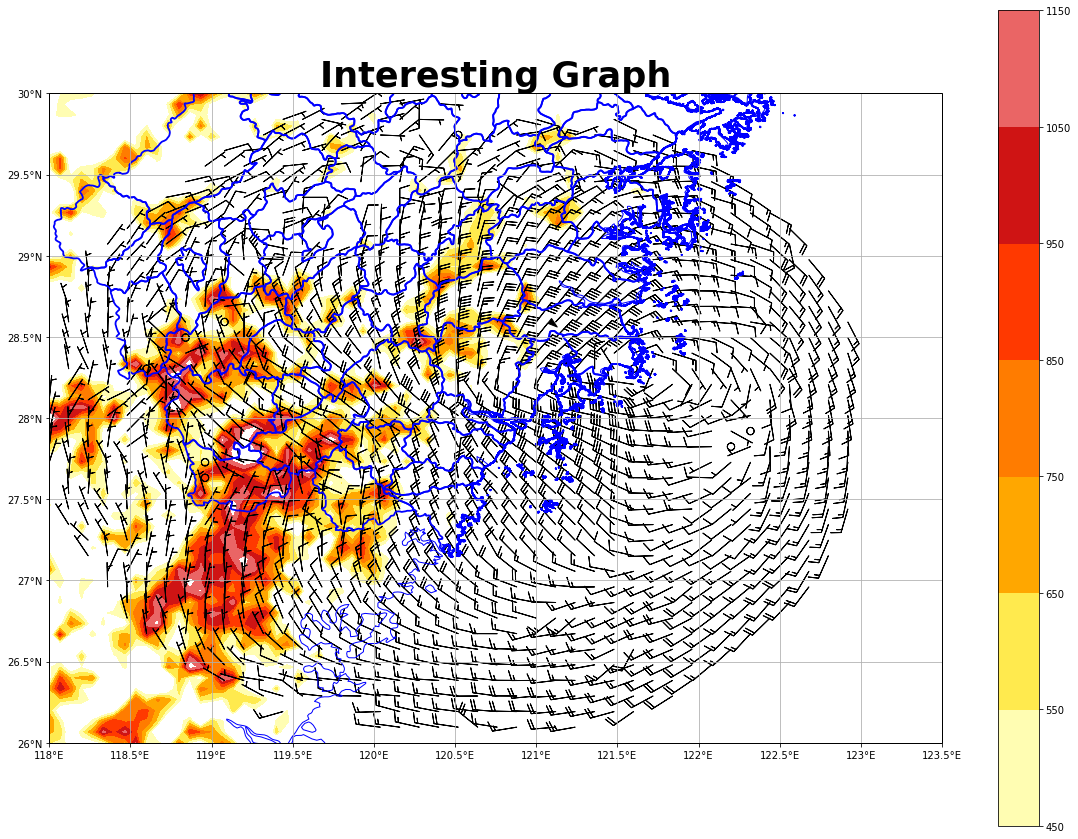

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import netCDF4 

from ncmaps import Cmaps

from matplotlib import cm, colors

from ncmaps import Cmaps
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
self_define_list = [130,144,155,170,185,200,225,235,245]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()

geo = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/geogphy_file/ETOPO1_Bed_g_gmt4.grd.nc')
x =geo.variables['x']
y = geo.variables['y']
z=  geo.variables['z']


f = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/out/Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc')

u =f.variables['u'][0,0,:,:]
v = f.variables['v'][0,0,:,:]
ref =  f.variables['ref'][0,1,:,:]
lat = f.variables['lat']
lon = f.variables['lon']




box = [118, 123.5, 26, 30]
scale = '10m'
xstep, ystep = 0.5, 0.5
fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent(box, crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical', 'land', scale, edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])
#ax.add_feature(land, facecolor='0.75')
ax.coastlines(scale,color="blue",linewidth=1.0)
fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(),  edgecolor='blue', facecolor='none')
ax.add_feature(shape_feature,linewidth=1.8)

#ax.stock_img()
# ===================================================
#标注坐标轴
ax.set_xticks(np.arange(box[0], box[1]+xstep,xstep), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(box[2], box[3]+ystep,ystep), crs=ccrs.PlateCarree())
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
#ax.quiver(lon[::3],lat[::3],u[::3,::3], v[::3,::3], transform=ccrs.PlateCarree())

#levels = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
levels = [450,550,650,750,850,950,1050,1150]
cont=ax.contourf(x[::4],y[::4],z[::4,::4],transform=ccrs.PlateCarree(),cmap=cmaps,levels=levels)
ax.barbs(lon[::6],lat[::6],u[::6,::6], v[::6,::6], transform=ccrs.PlateCarree())
plt.colorbar(cont, cmap = cmaps, ax = ax, spacing = 'uniform')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
ax.grid()
plt.title('Interesting Graph',fontsize=35,fontweight='bold') 
plt.savefig('wind.png')
plt.show()


In [18]:
path = 'Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc'
print(path[15:29])

20190809162900


In [40]:
def plot(filename):
    filepath=path + filename
    f = netCDF4.Dataset(filepath)
    u =f.variables['u'][0,0,:,:]
    v = f.variables['v'][0,0,:,:]
    ref =f.variables['ref'][0,0,:,:]
    lat = f.variables['lat']
    lon = f.variables['lon']
    box = [118, 123.5, 26, 30]
    scale = '10m'
    xstep, ystep = 0.5, 0.5
    fig = plt.figure(figsize=(20, 15))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(box, crs=ccrs.PlateCarree())
    land = cfeature.NaturalEarthFeature('physical', 'land', scale, edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
    #ax.add_feature(land, facecolor='0.75')
    ax.coastlines(scale)
    #ax.stock_img()
    # ===================================================
    #标注坐标轴
    ax.set_xticks(np.arange(box[0], box[1]+xstep,xstep), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(box[2], box[3]+ystep,ystep), crs=ccrs.PlateCarree())
    # zero_direction_label用来设置经度的0度加不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    #ax.quiver(lon[::3],lat[::3],u[::3,::3], v[::3,::3], transform=ccrs.PlateCarree())
    ax.barbs(lon[::8],lat[::8],u[::8,::8], v[::8,::8], transform=ccrs.PlateCarree())
    #ax.contourf(lon,lat, ref)
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    # 添加网格线
    ax.grid()
    plt.savefig('/home/liyuan3970/Typhoon_LMQ/src/wind_imege/'+filename+'.png')
    #plt.show()
    plt.clf()
    plt.close()
    
path = "/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/out/"
file = os.listdir(path)[:]
file.sort()

for i in file:
    plot(i)

In [41]:
import numpy as np
from PIL import Image
import os
import time
import matplotlib.pyplot as plt
import imageio
path = "/home/liyuan3970/Typhoon_LMQ/src/wind_imege/"
file = os.listdir(path)
file.sort()
for i in range(len(file)):
    file[i] = path +file[i]



In [42]:
import imageio


def create_gif(image_list, gif_name, duration=0.35):
    frames = []
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    imageio.mimsave(gif_name, frames, 'GIF', duration=duration)
    return


def main():
    image_list =file
    gif_name = 'wind.gif'
    duration = 0.35
    create_gif(image_list, gif_name, duration)


if __name__ == '__main__':
    main()

# 整合

In [53]:
def plot(filename):
    filepath=path + filename
    f = netCDF4.Dataset(filepath)
    u =f.variables['u'][0,1,:,:]
    v = f.variables['v'][0,1,:,:]
    ref =  f.variables['ref'][0,0,:,:]
    lat = f.variables['lat']
    lon = f.variables['lon']
    box = [118, 123.5, 26, 30]
    scale = '10m'
    xstep, ystep = 0.5, 0.5
    fig = plt.figure(figsize=(20, 15))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(box, crs=ccrs.PlateCarree())
    land = cfeature.NaturalEarthFeature('physical', 'land', scale, edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
    #ax.add_feature(land, facecolor='0.75')
    ax.coastlines(scale)
    #ax.stock_img()
    # ===================================================
    #标注坐标轴
    ax.set_xticks(np.arange(box[0], box[1]+xstep,xstep), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(box[2], box[3]+ystep,ystep), crs=ccrs.PlateCarree())
    # zero_direction_label用来设置经度的0度加不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    #ax.quiver(lon[::3],lat[::3],u[::3,::3], v[::3,::3], transform=ccrs.PlateCarree())
    ax.barbs(lon[::8],lat[::8],u[::8,::8], v[::8,::8], transform=ccrs.PlateCarree())
    #ax.contourf(lon,lat, ref)
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    # 添加网格线
    ax.grid()
    plt.xlabel(filename)
    plt.savefig('/home/liyuan3970/Typhoon_LMQ/src/wind_imege/'+filename+'.png')
    #plt.show()
    plt.clf()
    plt.close()
    
path = "/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/out/"
file = os.listdir(path)[:]
file.sort()

for i in file:
    plot(i)
    
import numpy as np
from PIL import Image
import os
import time
import matplotlib.pyplot as plt
import imageio
path = "/home/liyuan3970/Typhoon_LMQ/src/wind_imege/"
file = os.listdir(path)
file.sort()
for i in range(len(file)):
    file[i] = path +file[i]
import imageio


def create_gif(image_list, gif_name, duration=0.35):
    frames = []
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    imageio.mimsave(gif_name, frames, 'GIF', duration=duration)
    return


def main():
    image_list =file
    gif_name = 'wind.gif'
    duration = 0.35
    create_gif(image_list, gif_name, duration)
main()